In [84]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def plot(*args):
    count = len(args)
    fig, ax = plt.subplots(1,count)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    if count==1:
        ax.imshow(args[0], cmap="gray")
    else:
        for i in range(len(ax)):
            ax[i].imshow(args[i], cmap="gray")
    plt.show()

In [37]:
events = []

for line in open('events.txt'):
    line_events = [float(val) for val in line.split(" ")]
    if line_events[0] > 1:
        break
    events.append(line_events)


In [38]:
timestamps, x_cords, y_cords, polarities = [],[],[],[]

for (timestamp, x_cord, y_cord, polarity) in events:
    timestamps.append(timestamp)
    x_cords.append(x_cord)
    y_cords.append(y_cord)
    polarities.append(polarity)

print(len(timestamps))
print(timestamps[0])
print(timestamps[-1])
print(max(x_cords))
print(min(x_cords))
print(max(y_cords))
print(min(y_cords))
print(sum(polarities)/len(polarities))

72046
0.0
1.0
239.0
4.0
179.0
1.0
0.43079421480720653


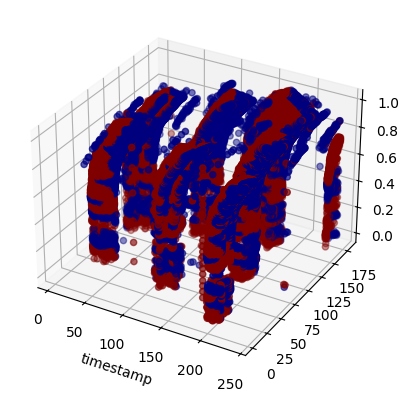

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_cords, y_cords, timestamps, c=polarities, cmap="jet")
ax.set_xlabel("x")
ax.set_xlabel("y")
ax.set_xlabel("timestamp")
plt.show()

In [40]:
x_cords_8000 = x_cords[:8000]
y_cords_8000 = y_cords[:8000]
timestamps_8000 = timestamps[:8000]
polarities_8000 = polarities[:8000]

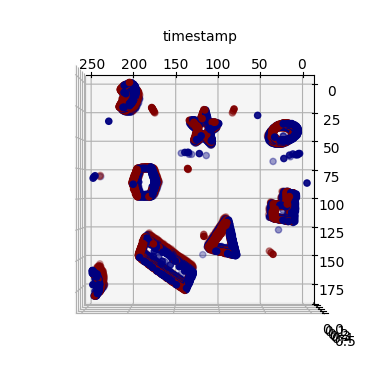

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_cords_8000, y_cords_8000, timestamps_8000, c=polarities_8000, cmap="jet")
ax.set_xlabel("x")
ax.set_xlabel("y")
ax.set_xlabel("timestamp")

ax.view_init(90,90)
plt.show()

In [48]:
timestamps_filtered = [t for t in timestamps if t > 0.5]
start_index = len(timestamps) - len(timestamps_filtered)
x_cords_filtered = x_cords[start_index:]
y_cords_filtered = y_cords[start_index:]
polarities_filtered = polarities[start_index:]

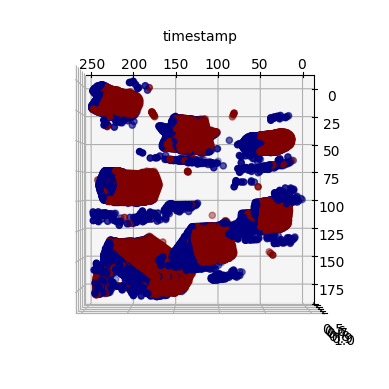

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_cords_filtered, y_cords_filtered, timestamps_filtered, c=polarities_filtered, cmap="jet")
ax.set_xlabel("x")
ax.set_xlabel("y")
ax.set_xlabel("timestamp")

ax.view_init(90,90)
plt.show()

In [60]:
events = []

for line in open('events.txt'):
    line_events = [float(val) for val in line.split(" ")]
    if line_events[0] < 1:
        continue
    if line_events[0] > 2:
        break
    events.append(line_events)

In [61]:
timestamps, x_cords, y_cords, polarities = [],[],[],[]

for (timestamp, x_cord, y_cord, polarity) in events:
    timestamps.append(timestamp)
    x_cords.append(int(x_cord))
    y_cords.append(int(y_cord))
    polarities.append(int(polarity) if polarity == 1 else 0)
    
    

In [63]:
def event_frame(x_cords, y_cords, polarities, image_shape=(180, 240)):
    res = np.ones(image_shape) * 127
    
    res = res.astype("uint8")
    
    for i in range(len(x_cords)):
        x, y, polarity = x_cords[i], y_cords[i], polarities[i]

        res[y,x] = 255 if polarity == 1 else 0
    
    return res



In [90]:

def do_all(tau = 0.010):

    x_vals, y_vals, timestamps_vals, polarities_vals = [], [], [], []
    
    res_imgs = []
    
    for i in range(len(events)):
        x, y, timestamp, polarity = x_cords[i], y_cords[i], timestamps[i], polarities[i]
        
        x_vals.append(x)
        y_vals.append(y)
        timestamps_vals.append(timestamp)
        polarities_vals.append(polarity)
    
        if timestamp - timestamps_vals[0] > tau:
            image = event_frame(x_vals, y_vals, polarities_vals)
            res_imgs.append(image)
            
            x_vals = []
            y_vals = []
            timestamps_vals = []
            polarities_vals = []

    return res_imgs

In [93]:
res_10ms=do_all()
res_100ms=do_all(tau=0.1)
res_500ms=do_all(tau=0.5)

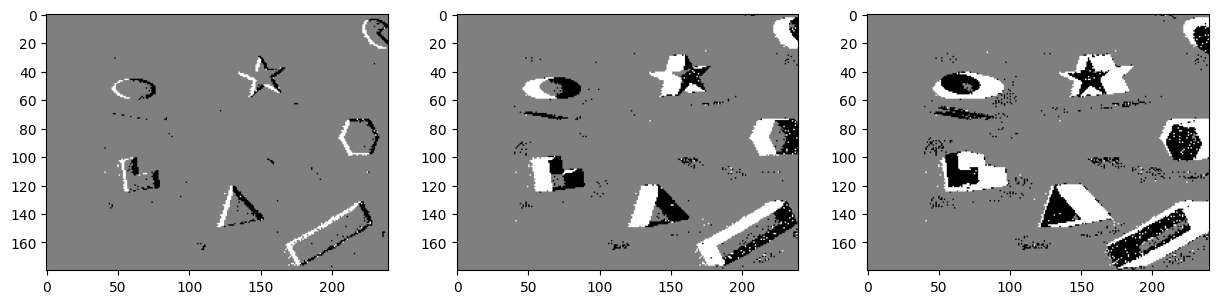

In [94]:
plot(res_10ms[0], res_100ms[0], res_500ms[0])